In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = '../data/fig4_103.csv'
df = pd.read_csv(in_file)
df.head()

,id,HIV,CB,group,mPFC_CE,PCC_CE,mPFC_C,PCC_C,mPFC_E,PCC_E,n_aware,n_unaware,n_error,anxiety,apathy,med_score,ND-GPT-SCORE,gpt_nd_tscore,unaware_log
0,P193,1,1,1,1.73,1.21,0.30,0.13,-1.43,-1.08,37,13,53,40,12,15,7,35,1.39
1,P194,1,1,1,-0.11,0.77,0.28,-0.25,0.38,-1.02,29,3,33,34,12,16,7,38,0.96
2,P198,1,1,1,1.82,0.06,-1.44,0.33,-3.26,0.28,84,14,98,29,12,11,11,51,1.15
3,P206,2,2,4,-0.62,-0.08,-1.49,-0.29,-0.88,-0.21,90,38,136,51,12,15,11,62,1.45
4,P211,2,1,3,0.47,-1.04,-0.73,-0.87,-1.20,0.17,122,3,126,24,12,12,12,63,0.38


In [2]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


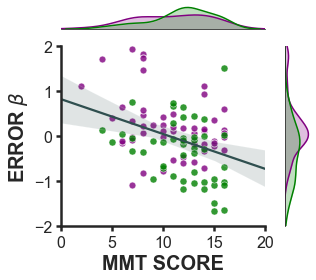

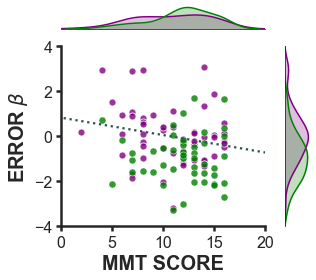

In [4]:
# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='med_score', y='PCC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='med_score', y='PCC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# Add the full sample central regression plot to the joint axis
sns.regplot(x='med_score', y='PCC_E', data=df, ax=ax_joint,
            color='darkslategray', label='all', truncate=False, scatter=False)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['med_score'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['PCC_E'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 5, 10, 15, 20])
ax_joint.set_xlim(0,20)
ax_joint.set_yticks([-2, -1, 0, 1, 2])
ax_joint.set_ylim(-2, 2)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_xlabel('MMT SCORE', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
#fig.set_size_inches((8, 6))
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[1].set_linestyle("")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.set_size_inches((4.5, 4))
fig.tight_layout()
fig.savefig(fname='./figure_5/PCC_error_med_score')
fig.show()

#######################################################################

# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='med_score', y='mPFC_E', 
                      data=hiv_pos_df, kind='reg',
                      height=6, color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='med_score', y='mPFC_E', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# Add the full sample central regression plot to the joint axis
sns.regplot(x='med_score', y='PCC_E', data=df, ax=ax_joint,
            color='darkslategray', label='all', truncate=False, scatter=False, ci=None)

# And the HIV-negative histograms to the corresponding axes
sns.distplot(hiv_neg_df['med_score'], color='green',
             hist=False, ax=ax_x,
             kde_kws={'shade': True})
sns.distplot(hiv_neg_df['mPFC_E'], color='green',
             hist=False, ax=ax_y,
             kde_kws={'shade': True},
             vertical=True)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 5, 10, 15, 20])
ax_joint.set_xlim(0,20)
ax_joint.set_yticks([-4, -2, 0, 2, 4])
ax_joint.set_ylim(-4, 4)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('MMT SCORE', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
#fig.set_size_inches((8, 6))
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.set_size_inches((4.5, 4))
fig.tight_layout()
fig.savefig(fname='./figure_5/mPFC_error_med_score')
fig.show()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

sns.set_style('white')
#Input data
in_file = '../data/cog_fail_103.csv'
df = pd.read_csv(in_file)
df.head()

,id,HIV,CB,mPFCerr,L_AIerr,R_AIerr,R_PPerr,R_put_hipperr,L_puterr,ForgetfulnessSum,DistractibilitySum,FalseTriggeringSum,cog_diff_sum,cog_fail_total,mPFC_err,PCC_err
0,P193,1,1,1.015470,2.266528,0.810037,-0.742396,-1.122720,-0.842915,5,7,2,19,14,-1.425085,-1.078092
1,P194,1,1,1.211410,1.227318,1.849166,-0.512405,0.134061,0.292526,12,10,9,0,31,0.383929,-1.017192
2,P198,1,1,1.650550,1.573945,2.596229,-0.027516,0.266900,0.383994,11,10,6,41,27,-3.255464,0.277732
3,P206,2,2,1.931792,0.008706,0.475784,0.389151,-0.601585,-0.830671,10,11,10,25,31,-0.876420,-0.214042
4,P211,2,1,1.808600,0.564547,1.711446,-0.120284,-0.005715,-0.145713,22,11,14,76,47,-1.202808,0.172738


In [2]:
df[['HIV', 'CB']]
df['HIV-status'] = df['HIV'].map({1: 'HIV-', 2: 'HIV+'})
df['CB-status'] = df['CB'].map({1: 'non-user', 2: 'user'})
df['group'] = df['HIV-status'] + ', ' + df['CB-status']

# We need a separate dataframe for each group
hiv_pos_df = df.loc[df['HIV-status'] == 'HIV+']
hiv_neg_df = df.loc[df['HIV-status'] == 'HIV-']

/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/jflanner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


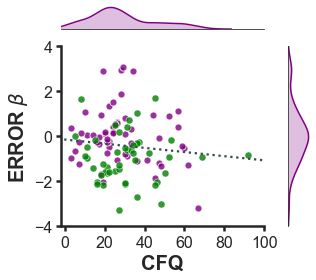

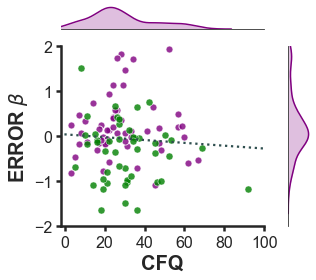

In [3]:
# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='cog_fail_total', y='mPFC_err', 
                      data=hiv_pos_df, kind='reg',
                      color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='cog_fail_total', y='mPFC_err', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# Add the full sample central regression plot to the joint axis
sns.regplot(x='cog_fail_total', y='mPFC_err', data=df, ax=ax_joint,
            color='darkslategray', label='all', truncate=False, scatter=False, ci=None)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
ax_joint.set_xlim(-2,100)
ax_joint.set_yticks([-4, -2, 0, 2, 4])
ax_joint.set_ylim(-4, 4)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.set_xlabel('CFQ', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
#fig.set_size_inches((8, 6))
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.set_size_inches((4.5, 4))
fig.tight_layout()
fig.savefig(fname='./figure_5/group_mpfc_err_cogfail')
fig.show()

#######################################################################

# Then we make the jointplot for one of the groups only
jgrid = sns.jointplot(x='cog_fail_total', y='PCC_err', 
                      data=hiv_pos_df, kind='reg',
                      color='purple', label='HIV positive',
                      joint_kws=dict(scatter_kws=dict(edgecolor='white', s=50)),
                      marginal_kws=dict(hist=False, kde_kws={'shade': True}),  # you can control axes with dicts
                      xlim=(-100, 500), ylim=(-100, 500), truncate=False, ci=None)  # note the huge limits
fig = jgrid.fig
ax_joint = jgrid.ax_joint
ax_x = jgrid.ax_marg_x
ax_y = jgrid.ax_marg_y

# Add the HIV-negative central regression plot to the joint axis
sns.regplot(x='cog_fail_total', y='PCC_err', data=hiv_neg_df, ax=ax_joint,
            color='green', label='HIV negative', scatter_kws=dict(edgecolor='white', s=50, linewidth=0.6), truncate=False, ci=None)

# Add the full sample central regression plot to the joint axis
sns.regplot(x='cog_fail_total', y='PCC_err', data=df, ax=ax_joint,
            color='darkslategray', label='all', truncate=False, scatter=False, ci=None)

# Clean up the axes
ax_y.set_ylabel(None)
ax_x.set_xlabel(None)
ax_joint.set_xticks([0, 20, 40, 60, 80, 100])
ax_joint.set_xlim(-2, 100)
ax_joint.set_yticks([-2, -1, 0, 1, 2])
ax_joint.set_ylim(-2, 2)
ax_joint.spines['left'].set_linewidth(2.5)
ax_joint.spines['bottom'].set_linewidth(2.5)
ax_joint.tick_params(axis='both', which='major', labelsize=16)
# Add a legend
ax_joint.legend(fontsize=16)
ax_joint.set_xlabel('CFQ', fontsize=20, fontweight='bold')
ax_joint.set_ylabel(r'ERROR $\beta$', fontsize=20, fontweight='bold')
#fig.set_size_inches((8, 6))
ax_joint.lines[0].set_linestyle("")
ax_joint.lines[1].set_linestyle("")
ax_joint.lines[2].set_linestyle(":")
ax_joint.tick_params(axis='both', which='major', labelsize=16,direction='out', length=5, left=True, bottom=True, width=2.5)
ax_joint.legend().set_visible(False)
fig.set_size_inches((4.5, 4))
fig.tight_layout()
fig.savefig(fname='./figure_5/group_PCC_err_cogfail')
fig.show()